**Ho Wa Chu**

Spring 2022

CS 251: Data Analysis and Visualization

# Lab 2b: 3D Scatter Plots and Rotation Matrices
## Task 1: Setup, Data Import and 3D Scatter Plots

### 1a) Setup
1. Import numpy
2. Import matplotlib.pyplot

In [1]:
# Header

import numpy as np
import matplotlib.pyplot as plt

plt.style.use(['seaborn-colorblind', 'seaborn-darkgrid'])
plt.rcParams['font.size'] = 15
plt.rcParams["figure.figsize"] = [8,4.5]

np.set_printoptions(suppress=True, precision=5)

# Automatically reload external modules
%load_ext autoreload
%autoreload 2

C:\Users\howac\AppData\Local\Temp\ipykernel_10476\3276286463.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(['seaborn-colorblind', 'seaborn-darkgrid'])
C:\Users\howac\AppData\Local\Temp\ipykernel_10476\3276286463.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(['seaborn-colorblind', 'seaborn-darkgrid'])


### 1b) Import the Data
1. Read the 3-dimensional toy dataset in 'data/gauss_3d.csv' into a numpy matrix with 3 columns (X, Y, and Z). [numpy.genfromtxt](https://numpy.org/doc/1.18/reference/generated/numpy.genfromtxt.html)
2. Print the ndarray.

In [2]:
arr = np.genfromtxt('data/gauss_3d.csv', delimiter = ',')
print(arr)

[[  -1.878   -1.013   73.627]
 [ -13.059   17.36    41.08 ]
 [ -12.641   -3.435  174.669]
 [ -15.365   34.323  607.439]
 [  -5.673  -14.979  598.393]
 [ -21.508  -21.41   973.77 ]
 [  -1.276  -19.761  817.145]
 [ -13.806   -8.358  301.274]
 [  -8.405  -11.787  470.952]
 [ -11.247   34.341  605.098]
 [  -2.689    0.103   75.917]
 [ -20.301  -15.14   668.435]
 [ -11.612   21.716  166.265]
 [ -11.92    -3.798  173.865]
 [  -4.331  -13.553  479.397]
 [ -15.499   18.138    6.781]
 [ -10.862   14.35   -15.52 ]
 [ -14.389   -1.524  145.707]
 [  -9.789   26.113  252.389]
 [  -7.086    6.937  -57.971]
 [ -15.503   29.254  350.007]
 [  -4.276   12.541   31.791]
 [  -5.492   28.382  313.531]
 [  -7.488    6.641  -22.467]
 [  -5.496  -13.296  579.077]
 [ -13.419   41.741  993.796]
 [ -10.614   -3.187  146.908]
 [ -14.679    2.017   57.476]
 [ -11.339   -5.506  225.864]
 [  -7.348    1.949   39.089]
 [ -13.458    8.64    17.061]
 [ -11.984    8.027   16.783]
 [ -13.436   14.915   30.182]
 [ -14.226

## Task 2: 3D graphing

- [MatPlotLib](https://matplotlib.org/)
- [MatPlotLib mplot3d](https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html)
- [MatPlotLib mplot3d demo](https://matplotlib.org/examples/mplot3d/scatter3d_demo.html)

#### Using the above links and MatPlotLib documentation to complete the following tasks:

Visualize the dataset with Matplotlib. All charts must include a title and axis labels.

1. Create a 3D Cartesian figure using the columns as labeled. 
2. Use dots instead of a solid line.

<IPython.core.display.Javascript object>


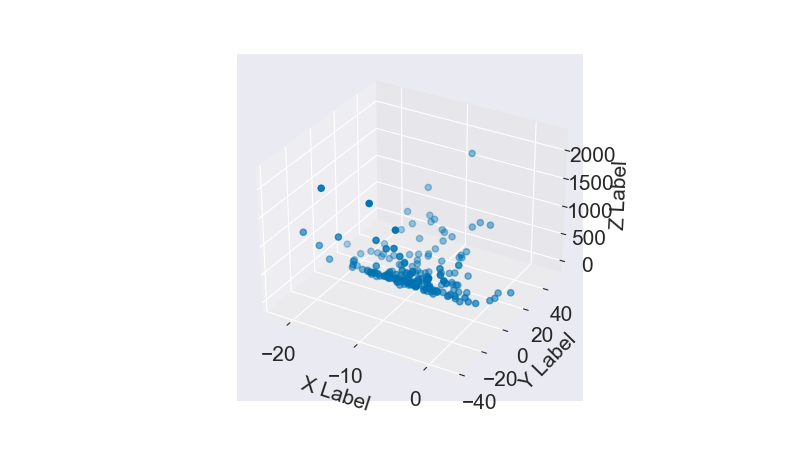

Text(0.5, 0, 'Z Label')

In [3]:
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(arr[:, 0], arr[:, 1], arr[:, 2], marker = 'o')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')


## Task 2: Rotation

### 2a) Prepare data for transformation matrices
We need to add a column of 1s to our dataset.
1. Create a matrix of ones of the correct dimensions. [numpy.ones](hhttps://numpy.org/doc/1.18/reference/generated/numpy.ones.html)
2. Add the new column to the imported data. [numpy.hstack](https://numpy.org/doc/1.18/reference/generated/numpy.hstack.html)


In [4]:
ones = np.ones([arr.shape[0], 1])
ones
data = np.hstack((arr,ones))
data

array([[  -1.878,   -1.013,   73.627,    1.   ],
       [ -13.059,   17.36 ,   41.08 ,    1.   ],
       [ -12.641,   -3.435,  174.669,    1.   ],
       [ -15.365,   34.323,  607.439,    1.   ],
       [  -5.673,  -14.979,  598.393,    1.   ],
       [ -21.508,  -21.41 ,  973.77 ,    1.   ],
       [  -1.276,  -19.761,  817.145,    1.   ],
       [ -13.806,   -8.358,  301.274,    1.   ],
       [  -8.405,  -11.787,  470.952,    1.   ],
       [ -11.247,   34.341,  605.098,    1.   ],
       [  -2.689,    0.103,   75.917,    1.   ],
       [ -20.301,  -15.14 ,  668.435,    1.   ],
       [ -11.612,   21.716,  166.265,    1.   ],
       [ -11.92 ,   -3.798,  173.865,    1.   ],
       [  -4.331,  -13.553,  479.397,    1.   ],
       [ -15.499,   18.138,    6.781,    1.   ],
       [ -10.862,   14.35 ,  -15.52 ,    1.   ],
       [ -14.389,   -1.524,  145.707,    1.   ],
       [  -9.789,   26.113,  252.389,    1.   ],
       [  -7.086,    6.937,  -57.971,    1.   ],
       [ -15.503,   

<img src="img/Rotation-Matrix.png" align="right" width="200"/>

### 2b) Design a rotation matrix

1. Design a transformation matrix that rotates the dataset 30 degrees about the Y axis
  - Identity Matrix: [eye](https://numpy.org/doc/1.18/reference/generated/numpy.eye.html)
  - [Trigonometric functions](https://numpy.org/doc/1.18/reference/routines.math.html)
  - Print your matrix


In [5]:
eye = np.eye(4)
eye
    arr1 = [np.cos(30), 0, np.sin(30), 0], [0,1,0,0], [-(np.sin(30)), 0, np.cos(30), 0], [0,0,0,1]
    r_trans = np.array(arr1)
    r_matrix = eye @ r_trans
r_matrix

array([[ 0.15425,  0.     , -0.98803,  0.     ],
       [ 0.     ,  1.     ,  0.     ,  0.     ],
       [ 0.98803,  0.     ,  0.15425,  0.     ],
       [ 0.     ,  0.     ,  0.     ,  1.     ]])

### 2c) Rotate data and Visualize Results in 2D

2. Multiply your transformation matrix with the dataset using matrix multiplication and transposed matrices
  - m @ n or [matmul](https://numpy.org/doc/1.18/reference/generated/numpy.matmul.html) 
  - [transpose](https://numpy.org/doc/1.18/reference/generated/numpy.ndarray.T.html#numpy.ndarray.T)
3. Create a figure with 3 subplots, graph the original data and rotated results for all 3 possible pairs of axes. Each subplot should have 2 datasets graphed on it, the original data and the rotated data in different colors.
  - <i>If you implemented a function in the previous lab, you can use it here.</i>
  - Each subplot should have a title
  - The plot should include a legend labeling which color is which dataset.

<IPython.core.display.Javascript object>


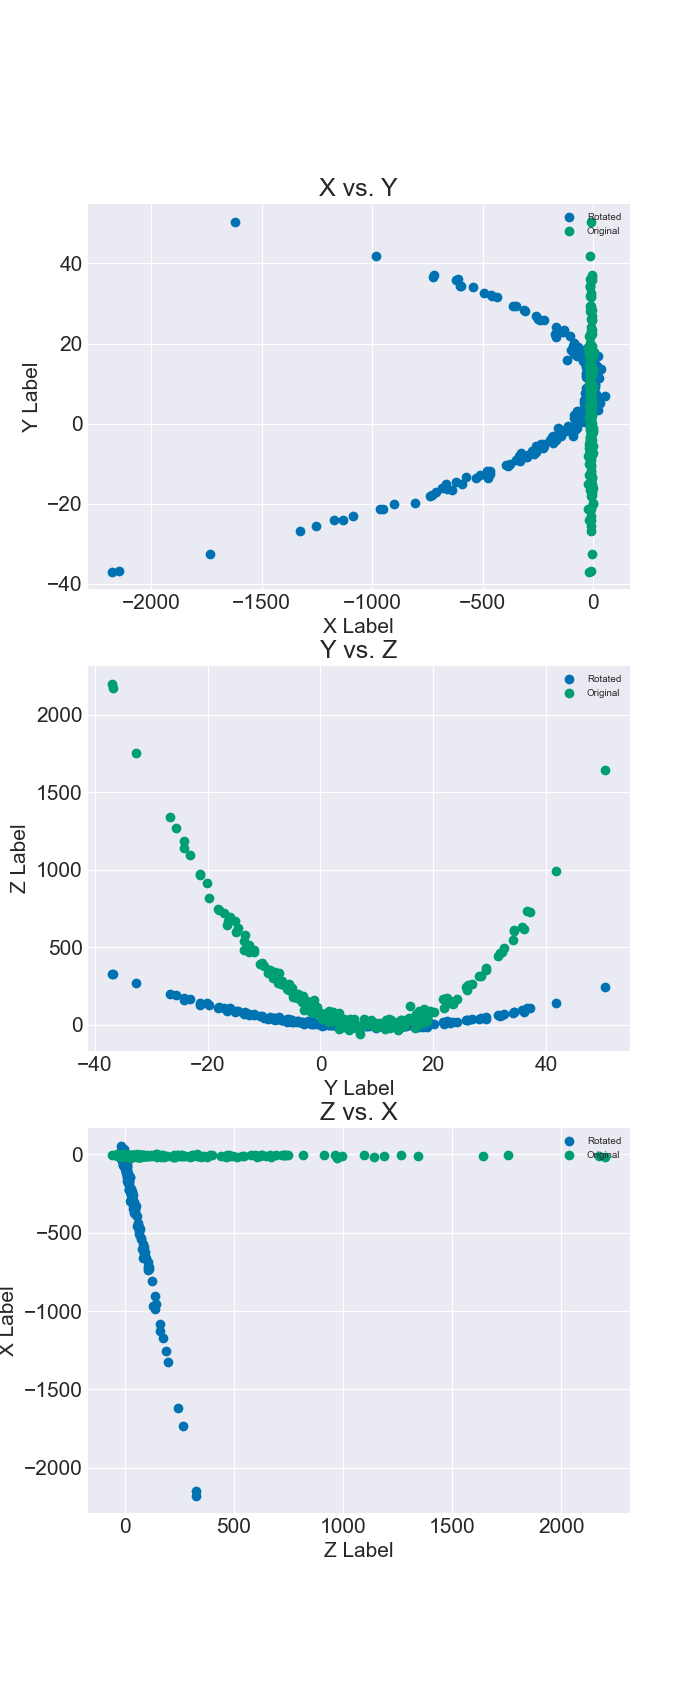

In [6]:
result = r_matrix @ data.T
result = result.T

fig = plt.figure(figsize = (7,17))

ax = fig.add_subplot(311)
ax.scatter(result[:, 0], result[:, 1], marker = 'o')
ax.scatter(arr[:, 0], arr[:, 1], marker = 'o')
plt.title('X vs. Y')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
plt.legend(['Rotated', 'Original'], loc = 'upper right', fontsize = 7)

ax = fig.add_subplot(312)
ax.scatter(result[:, 1], result[:, 2], marker = 'o')
ax.scatter(arr[:, 1], arr[:, 2], marker = 'o')
plt.title('Y vs. Z')
ax.set_xlabel('Y Label')
ax.set_ylabel('Z Label')
plt.legend(['Rotated', 'Original'], loc = 'upper right', fontsize = 7)

ax = fig.add_subplot(313)
ax.scatter(result[:, 2], result[:, 0], marker = 'o')
ax.scatter(arr[:, 2], arr[:, 0], marker = 'o')
plt.title('Z vs. X')
ax.set_xlabel('Z Label')
ax.set_ylabel('X Label')
plt.legend(['Rotated', 'Original'], loc = 'upper right', fontsize = 7)


### 2d) Visualize Rotated Data in 3D

- [MatPlotLib](https://matplotlib.org/)
- [MatPlotLib mplot3d](https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html)
- [MatPlotLib mplot3d demo](https://matplotlib.org/examples/mplot3d/scatter3d_demo.html)

#### Using the above links and MatPlotLib documentation to complete the following tasks:

Visualize the dataset with Matplotlib. All charts must include a title and axis labels.

1. Create a 3D Cartesian figure using the columns as labeled.  
2. Use dots instead of a solid line.
3. Graph the original dataset and rotated dataset on the same graph.

<IPython.core.display.Javascript object>


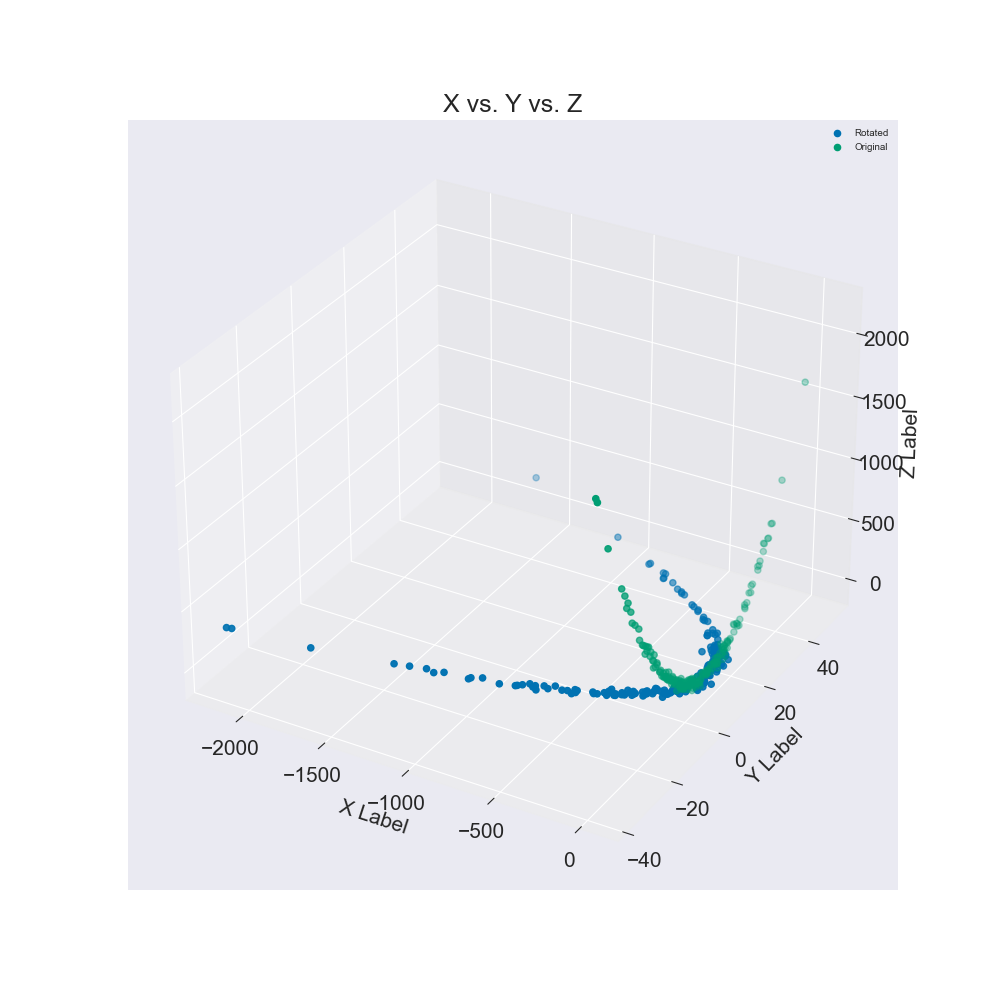

In [8]:
result = r_matrix @ data.T
result = result.T

fig = plt.figure(figsize = (10,10))

ax = fig.add_subplot(111, projection='3d')
ax.scatter(result[:, 0], result[:, 1], result[:, 2], marker = 'o')
ax.scatter(arr[:, 0], arr[:, 1], arr[:, 2], marker = 'o')
plt.title('X vs. Y vs. Z')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.legend(['Rotated', 'Original'], loc = 'upper right', fontsize = 7)

# ax = fig.add_subplot(312, projection='3d')
# ax.scatter(result[:, 1], result[:, 2], result[:, 0], marker = 'o')
# ax.scatter(arr[:, 1], arr[:, 2], arr[:, 0], marker = 'o')
# plt.title('X vs. Z vs. Y')
# ax.set_xlabel('X Label')
# ax.set_ylabel('Y Label')
# ax.set_zlabel('Z Label')
# plt.legend(['Rotated', 'Original'], loc = 'upper right', fontsize = 7)

# ax = fig.add_subplot(313, projection='3d')
# ax.scatter(result[:, 2], result[:, 0], result[:, 1], marker = 'o')
# ax.scatter(arr[:, 2], arr[:, 0], arr[:, 1], marker = 'o')
# plt.title('Z vs. X vs. Y')
# ax.set_xlabel('X Label')
# ax.set_ylabel('Y Label')
# ax.set_zlabel('Z Label')
# plt.legend(['Rotated', 'Original'], loc = 'upper right', fontsize = 7)
